In [1]:
import tensorflow as tf

2023-12-03 22:27:30.192860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import keras
from sklearn.model_selection import KFold



In [164]:
plt.rcParams.update(
    {
        "axes.grid": True,
        "grid.alpha": 0.5,
        "grid.linestyle": "--"
    }
)


## Import data

In [165]:
df = pd.read_csv("../data/FS_features_ABIDE_males.csv", sep=";")
df = df.set_index("FILE_ID")

# drop target
y = df["AGE_AT_SCAN"]
df = df.drop(["AGE_AT_SCAN", "SEX"], axis=1)

In [166]:
from sklearn.pipeline import Pipeline


linear_regressor = Pipeline(
    [
        ('scaler', PowerTransformer()),
        ("principal_components", PCA(n_components=20, svd_solver = 'full')),
        ("model",  Lasso())
    ]
)

param_distr = {"model__alpha": np.arange(1, 10)}


In [301]:
search = GridSearchCV(
    linear_regressor, 
    param_distr, 
    return_train_score=True, 
    scoring="neg_mean_absolute_error", 
    cv=KFold(shuffle=True)
)

search.fit(df.values, y.values)
print("Done")


Done


In [302]:
results_regressor = pd.DataFrame(search.cv_results_)
no_overfit = results_regressor["mean_train_score"] - results_regressor["mean_test_score"] < 6

(
    results_regressor[no_overfit]
    .sort_values("mean_test_score", ascending=False)
    .to_csv("best_model_regressor.csv", index=False)
)

In [303]:
results_regressor

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.525392,0.008408,0.011376,0.000152,1,{'model__alpha': 1},-3.130726,-3.587047,-3.343415,-3.574417,...,-3.504940,0.255057,1,-3.513624,-3.360552,-3.375411,-3.404058,-3.365302,-3.403790,0.056956
1,0.525057,0.008904,0.011378,0.000142,2,{'model__alpha': 2},-3.206421,-3.733756,-3.511315,-3.606067,...,-3.615991,0.267521,2,-3.665446,-3.473042,-3.597431,-3.517184,-3.478062,-3.546233,0.074405
2,0.528082,0.005280,0.011495,0.000167,3,{'model__alpha': 3},-3.316920,-3.835746,-3.673683,-3.614957,...,-3.712537,0.264529,3,-3.782780,-3.577047,-3.679416,-3.637104,-3.566375,-3.648544,0.078698
3,0.527357,0.002299,0.012581,0.001830,4,{'model__alpha': 4},-3.371966,-3.921743,-3.753456,-3.617083,...,-3.757274,0.256241,4,-3.837830,-3.636879,-3.734047,-3.704395,-3.616281,-3.705886,0.078734
4,0.542543,0.025223,0.011669,0.000214,5,{'model__alpha': 5},-3.418648,-3.978349,-3.786265,-3.631704,...,-3.785537,0.245966,5,-3.863648,-3.658446,-3.760791,-3.735464,-3.640877,-3.731845,0.079857
5,0.547673,0.032449,0.015497,0.007710,6,{'model__alpha': 6},-3.483819,-4.047048,-3.837421,-3.657301,...,-3.826043,0.233312,6,-3.896894,-3.693432,-3.791917,-3.770688,-3.677133,-3.766013,0.078728
6,0.560056,0.044647,0.011518,0.000214,7,{'model__alpha': 7},-3.560112,-4.126330,-3.877569,-3.694166,...,-3.871395,0.221381,7,-3.940902,-3.735851,-3.821946,-3.821176,-3.726483,-3.809271,0.077296
7,0.606102,0.120090,0.012028,0.000344,8,{'model__alpha': 8},-3.640036,-4.211265,-3.920920,-3.751284,...,-3.924093,0.211146,8,-3.992336,-3.792506,-3.860022,-3.877966,-3.787238,-3.862014,0.074384
8,0.539231,0.004812,0.011601,0.000204,9,{'model__alpha': 9},-3.687827,-4.304946,-3.967656,-3.790742,...,-3.970647,0.219722,9,-4.031380,-3.856364,-3.905056,-3.921027,-3.856806,-3.914126,0.064032


In [304]:
pd.read_csv("best_model_regressor.csv").head(1).T

,0
mean_fit_time,0.525392
std_fit_time,0.008408
mean_score_time,0.011376
std_score_time,0.000152
param_model__alpha,1
params,{'model__alpha': 1}
split0_test_score,-3.130726
split1_test_score,-3.587047
split2_test_score,-3.343415
split3_test_score,-3.574417


## Neural network

In [307]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from itertools import product
from sklearn.model_selection import RandomizedSearchCV


In [323]:
def twoLayerFeedForward(nlayers, hiddens, dropouts, meta):
    clf = Sequential()
    X_shape_ = (meta["X_shape_"][1],)

    clf.add(Dense(hiddens[0], activation='relu', input_shape=X_shape_))
    if dropouts[0] > 0:
        clf.add(Dropout(dropouts[0]))
    for i in range(1, nlayers):
        clf.add(Dense(hiddens[i], activation='relu'))
        if dropouts[i] > 0:
            clf.add(Dropout(dropouts[i]))
    clf.add(Dense(1))
    return clf

callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    restore_best_weights=True,

)


mlp = KerasRegressor(
    twoLayerFeedForward, 
    epochs=200, 
    loss="mse",
    callbacks=[callback],
    validation_split=0.2,
    nlayers=3,
    hiddens=[2,2,2],
    dropouts=[0.2, 0, 0],
    verbose=0
)

In [324]:
valid_entries = [4, 8, 16, 32, 64]
hidden_layers = list(product(valid_entries, repeat=6))
dropouts = list(np.random.choice([0.0, 0.1, 0.2, 0.3], p=[0.4, 0.2, 0.2, 0.2], size=(2000, 6)))
                     

In [325]:
model = Pipeline(
    [
        ('scaler', PowerTransformer()),
        ("principal_components", PCA(n_components=20, svd_solver = 'full')),
        ("mlp", mlp)
    ]
)

params = {
    "mlp__nlayers": np.random.randint(1, 7, size=2000),
    "mlp__hiddens": hidden_layers,
    "mlp__dropouts": dropouts,
    "mlp__optimizer__learning_rate": [0.0001, 0.001, 0.005],
}

In [326]:
gs = RandomizedSearchCV(
    model, 
    params, 
    refit=False, 
    cv=KFold(shuffle=True), 
    return_train_score=True,
    scoring="neg_mean_absolute_error", 
    n_iter=100, 
    verbose=3
)

In [327]:
gs.fit(df.values, y.values)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END mlp__dropouts=[0.  0.  0.1 0.  0.  0.2], mlp__hiddens=(64, 4, 16, 4, 16, 8), mlp__nlayers=6, mlp__optimizer__learning_rate=0.001;, score=(train=-3.289, test=-3.781) total time=   1.7s
[CV 2/5] END mlp__dropouts=[0.  0.  0.1 0.  0.  0.2], mlp__hiddens=(64, 4, 16, 4, 16, 8), mlp__nlayers=6, mlp__optimizer__learning_rate=0.001;, score=(train=-3.438, test=-4.039) total time=   1.8s
[CV 3/5] END mlp__dropouts=[0.  0.  0.1 0.  0.  0.2], mlp__hiddens=(64, 4, 16, 4, 16, 8), mlp__nlayers=6, mlp__optimizer__learning_rate=0.001;, score=(train=-3.314, test=-3.313) total time=   1.8s
[CV 4/5] END mlp__dropouts=[0.  0.  0.1 0.  0.  0.2], mlp__hiddens=(64, 4, 16, 4, 16, 8), mlp__nlayers=6, mlp__optimizer__learning_rate=0.001;, score=(train=-3.438, test=-3.739) total time=   1.7s
[CV 5/5] END mlp__dropouts=[0.  0.  0.1 0.  0.  0.2], mlp__hiddens=(64, 4, 16, 4, 16, 8), mlp__nlayers=6, mlp__optimizer__learning_rate=0.001;, score

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', PowerTransformer()),
                                             ('principal_components',
                                              PCA(n_components=20,
                                                  svd_solver='full')),
                                             ('mlp',
                                              KerasRegressor(callbacks=[<keras.callbacks.EarlyStopping object at 0x7fd76c713640>], dropouts=[0.2, 0, 0], epochs=200, hiddens=[2, 2, 2], loss='mse', model=<functio...
                                                         (4, 4, 4, 4, 32, 32),
                                                         (4, 4, 4, 4, 32, 64),
                                                         (4, 4, 4, 4, 64, 4),
                                                         (4, 4, 4, 4, 64, 8),
                                                         (4, 4, 4, 4, 64, 16),
                                                         (4, 4, 4, 4, 64, 32),
                                                         (4, 4, 4, 4, 64, 64),
                                                         (4, 4, 4, 8, 4, 4),
                                                         (4, 4, 4, 8, 4, 8),
                                                         (4, 4, 4, 8, 4, 16),
                                                         (4, 4, 4, 8, 4, 32),
                                                         (4, 4, 4, 8, 4, 64), ...],
                                        'mlp__nlayers': array([1, 6, 3, ..., 5, 3, 3]),
                                        'mlp__optimizer__learning_rate': [0.0001,
                                                                          0.001,
                                                                          0.005]},
                   refit=False, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=3)

In [328]:
df_results = pd.DataFrame(gs.cv_results_)

In [333]:
no_overfit = df_results["mean_train_score"] - df_results["mean_test_score"] < 0.3

In [334]:
df_results[no_overfit].sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__optimizer__learning_rate,param_mlp__nlayers,param_mlp__hiddens,param_mlp__dropouts,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
90,1.381248,0.038405,0.068078,0.005896,0.005,3,"(4, 64, 8, 4, 8, 16)","[0.1, 0.0, 0.2, 0.0, 0.2, 0.0]","{'mlp__optimizer__learning_rate': 0.005, 'mlp_...",-3.444679,...,-3.245788,0.184700,1,-3.123399,-2.881489,-3.200226,-3.204078,-2.883873,-3.058613,0.146505
47,2.399896,0.283920,0.072665,0.002338,0.001,4,"(4, 4, 32, 8, 8, 16)","[0.0, 0.1, 0.0, 0.1, 0.2, 0.2]","{'mlp__optimizer__learning_rate': 0.001, 'mlp_...",-3.502558,...,-3.306568,0.217319,2,-3.202178,-3.265401,-3.032918,-3.439771,-3.160560,-3.220165,0.133575
6,2.196659,0.183173,0.065548,0.001259,0.001,3,"(4, 32, 16, 8, 32, 4)","[0.1, 0.2, 0.2, 0.0, 0.1, 0.2]","{'mlp__optimizer__learning_rate': 0.001, 'mlp_...",-3.510855,...,-3.390546,0.302877,3,-3.142341,-3.310471,-3.101906,-3.179767,-3.135069,-3.173911,0.072626
44,1.448093,0.160615,0.075976,0.004562,0.005,5,"(4, 64, 8, 32, 16, 16)","[0.2, 0.0, 0.1, 0.0, 0.3, 0.1]","{'mlp__optimizer__learning_rate': 0.005, 'mlp_...",-3.207207,...,-3.451918,0.515716,5,-3.128185,-3.862343,-3.072557,-3.394035,-3.495929,-3.390610,0.284134
8,1.277616,0.060783,0.070754,0.003336,0.005,4,"(16, 16, 32, 8, 32, 4)","[0.2, 0.1, 0.1, 0.0, 0.3, 0.3]","{'mlp__optimizer__learning_rate': 0.005, 'mlp_...",-3.679821,...,-3.457536,0.185252,7,-3.400886,-2.870856,-3.252017,-3.121352,-3.304009,-3.189824,0.183239
63,2.156716,0.165973,0.071492,0.001492,0.001,5,"(4, 16, 32, 8, 4, 8)","[0.0, 0.0, 0.0, 0.3, 0.0, 0.3]","{'mlp__optimizer__learning_rate': 0.001, 'mlp_...",-3.738486,...,-3.482312,0.314462,9,-3.206298,-3.450732,-3.505153,-3.251069,-3.434089,-3.369468,0.118180
83,1.747765,0.127198,0.065332,0.003197,0.001,3,"(4, 64, 32, 8, 8, 8)","[0.0, 0.0, 0.0, 0.3, 0.3, 0.0]","{'mlp__optimizer__learning_rate': 0.001, 'mlp_...",-3.356810,...,-3.491877,0.297740,10,-3.032396,-3.292912,-3.188334,-3.490692,-3.274313,-3.255729,0.149235
10,1.272680,0.062594,0.078090,0.004779,0.005,5,"(64, 16, 64, 4, 32, 8)","[0.0, 0.1, 0.0, 0.0, 0.3, 0.3]","{'mlp__optimizer__learning_rate': 0.005, 'mlp_...",-3.984387,...,-3.511034,0.294358,12,-3.639168,-3.225021,-3.512329,-3.147330,-2.962338,-3.297237,0.246181
50,1.446125,0.064014,0.076042,0.004591,0.005,5,"(8, 32, 16, 64, 4, 4)","[0.0, 0.2, 0.2, 0.2, 0.2, 0.0]","{'mlp__optimizer__learning_rate': 0.005, 'mlp_...",-3.772745,...,-3.548365,0.294348,14,-3.605911,-3.195032,-3.059955,-3.527445,-3.104705,-3.298610,0.224536
88,1.121251,0.054270,0.064064,0.000459,0.005,3,"(64, 4, 32, 4, 32, 32)","[0.1, 0.2, 0.0, 0.1, 0.0, 0.1]","{'mlp__optimizer__learning_rate': 0.005, 'mlp_...",-3.801082,...,-3.600028,0.317610,22,-3.483200,-3.011451,-3.564499,-3.021721,-3.536013,-3.323377,0.251870


In [335]:
(
    df_results[no_overfit]
    .sort_values("mean_test_score", ascending=False)
    .to_csv("best_model_2.csv", index=False)
)

## Plot

In [336]:
best_model = pd.read_csv("best_model_2.csv")
best_model.head(1).T

,0
mean_fit_time,1.381248
std_fit_time,0.038405
mean_score_time,0.068078
std_score_time,0.005896
param_mlp__optimizer__learning_rate,0.005
param_mlp__nlayers,3
param_mlp__hiddens,"(4, 64, 8, 4, 8, 16)"
param_mlp__dropouts,[0.1 0. 0.2 0. 0.2 0. ]
params,"{'mlp__optimizer__learning_rate': 0.005, 'mlp_..."
split0_test_score,-3.444679


In [361]:
mlp = KerasRegressor(
    twoLayerFeedForward, 
    epochs=200, 
    loss="mse",
    callbacks=[callback],
    validation_split=0.2,
    nlayers=3,
    dropouts=[0.2, 0., 0.],
    hiddens=(4, 4, 32),
    verbose=1
)

In [379]:
preprocessing_pipe = Pipeline(
    [
        ('scaler', PowerTransformer()),
        ("principal_components", PCA(n_components=20, svd_solver = 'full')),
    ]
)

In [380]:
mlp = twoLayerFeedForward(
    hiddens=(4, 64, 8,),
    dropouts=[0.1, 0., 0.2],
    nlayers=3,
    meta={"X_shape_":(0, 20)}
)
mlp.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss="mae")
mlp.summary()

Model: "sequential_1690"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7591 (Dense)          (None, 4)                 84        
                                                                 
 dropout_3654 (Dropout)      (None, 4)                 0         
                                                                 
 dense_7592 (Dense)          (None, 64)                320       
                                                                 
 dense_7593 (Dense)          (None, 8)                 520       
                                                                 
 dropout_3655 (Dropout)      (None, 8)                 0         
                                                                 
 dense_7594 (Dense)          (None, 1)                 9         
                                                                 
Total params: 933
Trainable params: 933
Non-trainab

In [381]:
new_df = preprocessing_pipe.fit_transform(df.values)

In [382]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    restore_best_weights=True,
)

mlp.fit(new_df, y.values, epochs=200, validation_split=0.2, callbacks=[callback], verbose=0, shuffle=True)

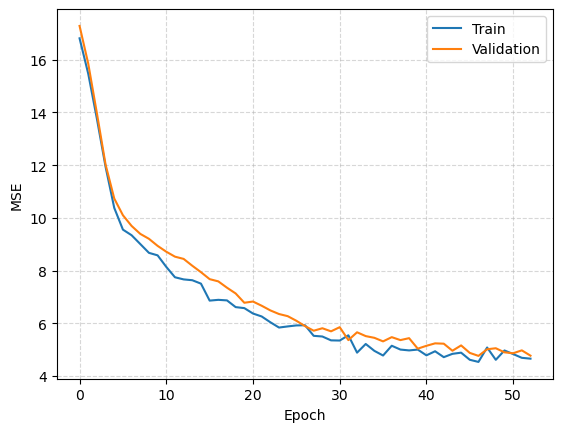

In [383]:
loss_history = mlp.history.history["loss"]
loss_history_val = mlp.history.history["val_loss"]
plt.plot(loss_history, label="Train")
plt.plot(loss_history_val, label="Validation")
plt.xlabel("Epoch")
#plt.yscale("log")
plt.ylabel("MSE")
plt.legend()
